In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/geyser_data.csv')
df.head()


,eruptions,waiting
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


In [3]:
df.shape

(385, 2)

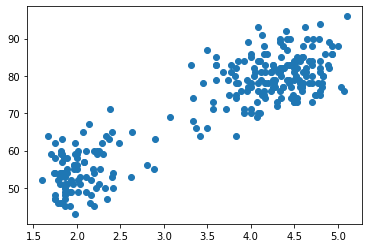

In [4]:
plt.scatter(df['eruptions'],df['waiting'])
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
x=df

In [8]:
x.isnull().sum()

eruptions    113
waiting      113
dtype: int64

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
#print(x['waiting'].tail())
x_e_median=x['eruptions'].median()
x['eruptions'].fillna(x_e_median,inplace=True)
print(x['eruptions'].tail(2))
print(x['eruptions'].isnull().sum())
x_w_median=x['waiting'].median()
x_w_median
x['waiting'].fillna(x_w_median,inplace=True)
print(x['waiting'].isnull().sum())
x['waiting'].tail(2)

383    4.000
384    4.467
Name: eruptions, dtype: float64
0
0


383    76.0
384    74.0
Name: waiting, dtype: float64

In [11]:
x.shape

(385, 2)

### Elbow Method

[52539.97466765161, 10146.28536304935, 5241.101819333895, 2944.6653676670885, 2073.8731344978787, 1469.4120846200608, 1062.6587013585122, 852.1153807565635, 648.8504715025248]


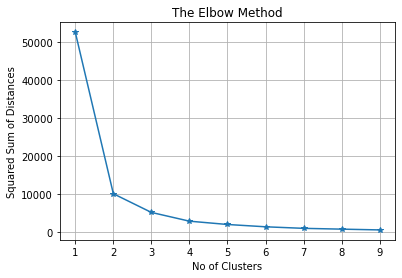

In [12]:
wcss = [] 
for i in range(1, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(x)               
    wcss.append(clf.inertia_) 

print(wcss)
plt.plot(range(1, 10), wcss,marker='*')
plt.xlabel('No of Clusters')
plt.ylabel('Squared Sum of Distances')
plt.title('The Elbow Method')
plt.grid()
plt.show()

### KMeans with 2 clusters without scaling

In [13]:
km = KMeans(n_clusters=2)

In [14]:
km.fit(x)

KMeans(n_clusters=2)

In [15]:
y_pred2=km.predict(x)
#y_pred2

In [16]:
#plt.scatter(x['eruptions'],x['waiting'],marker=('o'),s=20,color='blue')

In [17]:
cent2 = km.cluster_centers_
cent2

array([[ 4.17264685, 78.54545455],
       [ 2.09393939, 54.62626263]])

In [18]:
labels = km.labels_
#labels

In [19]:
km.inertia_

10146.28536304935

In [20]:
x['Cluster2'] = y_pred2
print(x.head(2))
x['Cluster2'].value_counts()

   eruptions  waiting  Cluster2
0        3.6     79.0         0
1        1.8     54.0         1


0    286
1     99
Name: Cluster2, dtype: int64

#### Plot for 2 cluster

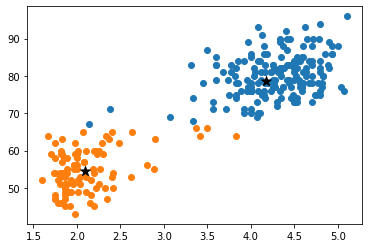

In [21]:
df0 = x[x['Cluster2']==0]
df1 = x[x['Cluster2']==1]
plt.scatter(df0['eruptions'],df0['waiting'])
plt.scatter(df1['eruptions'],df1['waiting'])
plt.scatter(cent2[:,0],cent2[:,1],color='black',marker='*',s= 100)
plt.show()

#### Scaling data with MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
x['eruptions'] = scaler.fit_transform(x[['eruptions']])
x['waiting'] = scaler.fit_transform(x[['waiting']])

In [24]:
x.head(2)

,eruptions,waiting,Cluster2
0,0.571429,0.679245,0
1,0.057143,0.207547,1


##### Clusting  with 2 after MinMaxScaling

In [25]:
sx = x[['eruptions','waiting']]

In [26]:
sx.head(2)

,eruptions,waiting
0,0.571429,0.679245
1,0.057143,0.207547


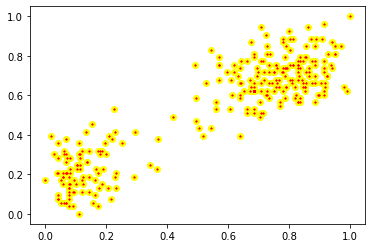

In [27]:
plt.scatter(sx['eruptions'],sx['waiting'],color='yellow',marker='o')
plt.scatter(x['eruptions'],x['waiting'],color='red',marker='*',s=2)
plt.show()

In [28]:
km.fit(sx)

KMeans(n_clusters=2)

In [29]:
y_pred2_scaled = km.predict(sx)
y_pred2_scaled

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
center2_scaled =km.cluster_centers_
center2_scaled

array([[0.7362877 , 0.66837002],
       [0.12518115, 0.21688387]])

In [31]:
labels = km.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
km.inertia_

7.211578948721187

In [33]:
x['Cluster2_sc'] = y_pred2_scaled
x.head()

,eruptions,waiting,Cluster2,Cluster2_sc
0,0.571429,0.679245,0,0
1,0.057143,0.207547,1,1
2,0.495143,0.584906,0,0
3,0.195143,0.358491,1,1
4,0.838000,0.792453,0,0


In [34]:
x['Cluster2_sc'].value_counts()

0    288
1     97
Name: Cluster2_sc, dtype: int64

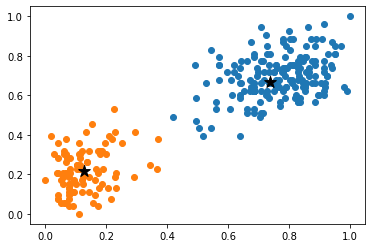

In [35]:
df0 = x[x['Cluster2_sc']==0]
df1 = x[x['Cluster2_sc']==1]
plt.scatter(df0['eruptions'],df0['waiting'])
plt.scatter(df1['eruptions'],df1['waiting'])
plt.scatter(center2_scaled[:,0],center2_scaled[:,1],color='black',marker='*',s=150)
plt.show()